This paper presents a novel set of stimuli, which we refer to as "logpolar gratings" or "scaled gratings". These stimuli are sinusoidal gratings whose spatial frequency decreases as the reciprocal of the eccentricity. To be specific local spatial frequency is 

$$\omega_l(r,\theta)=\frac{\sqrt{\omega_r^2+\omega_a^2}}{r}$$

where coordinates $(r,\theta)$ specify the eccentricity and polar angle, relative to the center of the image. The angular frequency $\omega_a$ is an integer specifying the number of grating cycles per revolution around the image, while the radial frequency $\omega_r$ specifies the number of radians per unit increase in $\ln(r)$.

See the paper for more details about the stimuli and their specific use in this experiment. This notebook shows how you can use the software included in this repo to create these stimuli and presents linear approximations of them (but see [spatial-frequency-stimuli](https://github.com/billbrod/spatial-frequency-stimuli) for a stand-alone repo with a command-line interface for creating sets of these stimuli).

In [1]:
# import necessary packages
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import sfp 
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import pyrtools as pt
%matplotlib inline

Failed to import duecredit due to No module named 'duecredit'
/home/billbrod/miniforge3/envs/sfp/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Creation of stimuli

Our stimuli can be created by calling `sfp.stimuli.log_polar_grating`, and specifying the size and several other parameters (note that we only support square gratings):

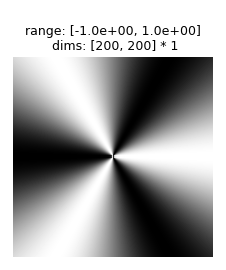

In [2]:
stim = sfp.stimuli.log_polar_grating(200, w_a=3)
pt.imshow(stim);

In the visualization above, with `w_r=0,w_a=3`, we can see clearly that `w_a` specifies the number of grating cycles per revolution across the image.

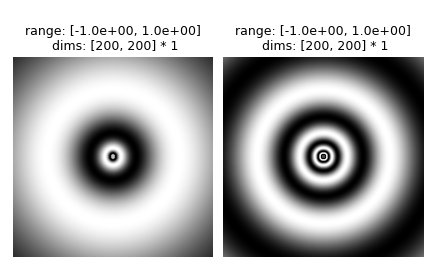

In [3]:
stim = []
for i in [3, 6]:
    stim.append(sfp.stimuli.log_polar_grating(200, w_r=i))
pt.imshow(stim);

`w_r` is a little bit harder to grok, but in the above we can see that increasing it increases the number of times the grating cycles in the radial direction.

In our experiment, we created an anti-aliasing mask to put at the center of each stimulus image, as well as rescaled the stimuli to account for the projector's modulation transfer function (MTF).

## Linear approximations of stimuli

The following shows some linear approximations of our stimuli. First, we generate the stimuli, and then we calculate the analytic spatial frequency with respect to x and y everywhere in the image.

In [4]:
w_r = 6
w_a = 11
phase = 0
stim = sfp.stimuli.log_polar_grating(500, w_r=w_r, w_a=w_a, phi=phase)
dx, dy, _, _ = sfp.stimuli.create_sf_maps_cpp(stim.shape[0], w_r=w_r, w_a=w_a)

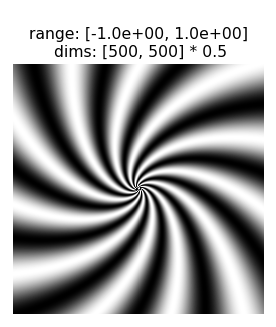

In [5]:
pt.imshow([stim], zoom=.5);

We then use these spatial frequency maps to create a linear approximation: the top shows a windowed view of our actual stimuli, while the bottom shows a windowed view of the linear approximation. The approximation is created by creating a standard sinusoid (that is, one with a constant spatial frequency and orientation) with the analytic dx and dy calculated above at the center of each of the little windows. For relatively small values of `w_r,w_a` and relatively large numbers of windows, the approximation willb e pretty good, though you can see it start to fail near the center of the image, where the actual stimulus's spatial frequency is changing rapidly, and so the linear approximation (which has a constant spatial frequency in each image) is notably different.

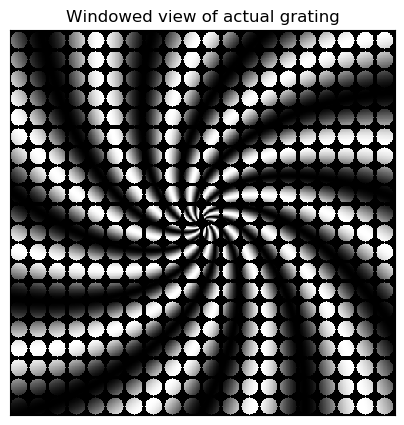

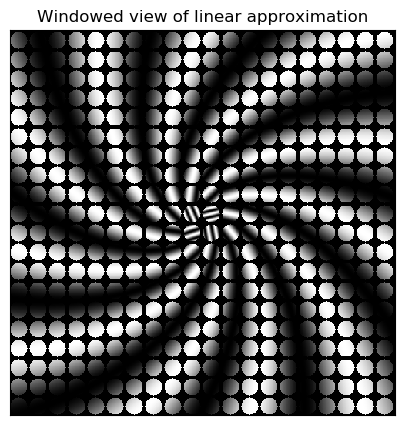

In [6]:
masked_grating, masked_approx = sfp.plotting.plot_grating_approximation(stim, dx, dy, num_windows=20, w_r=w_r, w_a=w_a, phase=phase)

If we decrease the number of windows, we can see this more clearly:

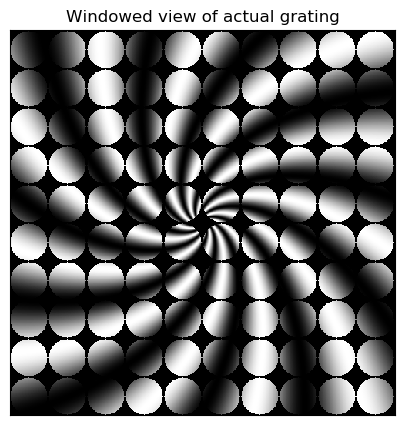

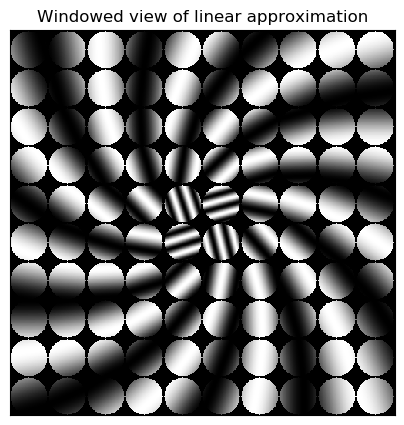

In [7]:
masked_grating, masked_approx = sfp.plotting.plot_grating_approximation(stim, dx, dy, num_windows=10, w_r=w_r, w_a=w_a, phase=phase)

This approximation should provide an assurance that our analytic solution for the local spatial frequency of the image is accurate.

As an interesting aside, while creating this visualization, I discovered a strange visual illusion, which I presented at VSS 2018's demo night (as far as I'm aware, it hasn't been documented elsewhere). In the images above, the space between the windows is black. If that space is mid-gray instead, you get an illusory grating that appears between the windows. I put together a [webapp](https://wfbroderick.com/illusory-grating/) so you can see it for yourself (note the webapp takes a while to load; here's the [gitlab repo](https://gitlab.com/billbrod/illusory-grating/) if you'd like to view the code).